<a href="https://colab.research.google.com/github/MahmoudNasrAly/Predictive-Analytics-for-Diabetes-Management/blob/main/Predictive-Analytics-for-Diabetes-Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('/content/diabetes.csv')
data

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data

diabets_df = pd.DataFrame(data)
diabets_df.describe(include = "all")

diabets_df.shape

diabets_df.info()

diabets_df['Outcome'].value_counts()

# missing value count
diabets_df.isna().sum()

diabets_df.groupby('Outcome').mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


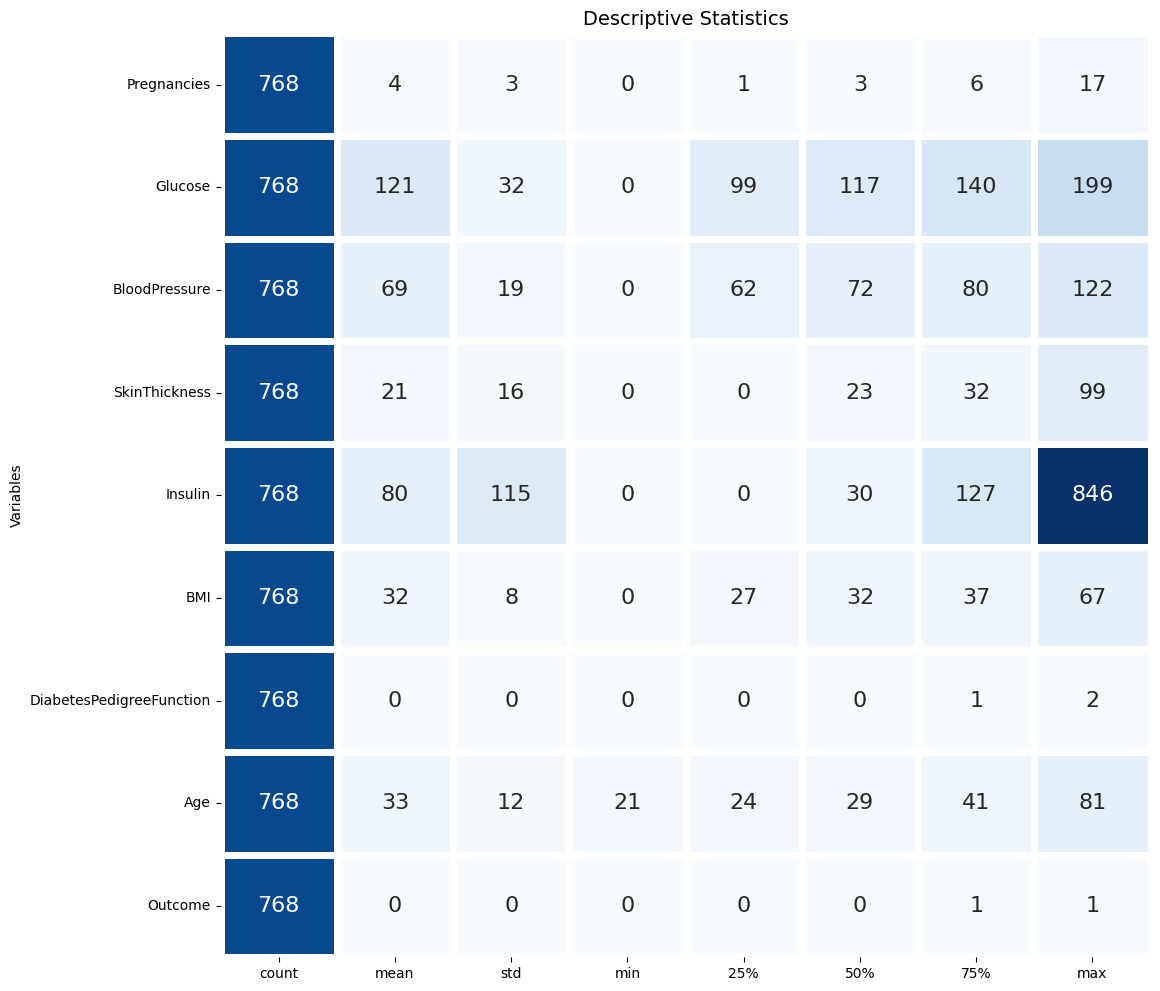

In [ ]:
# Show detaile data set
desc = diabets_df.describe().T
diabets_df2 = pd.DataFrame(index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(diabets_df2, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 14)
plt.show()


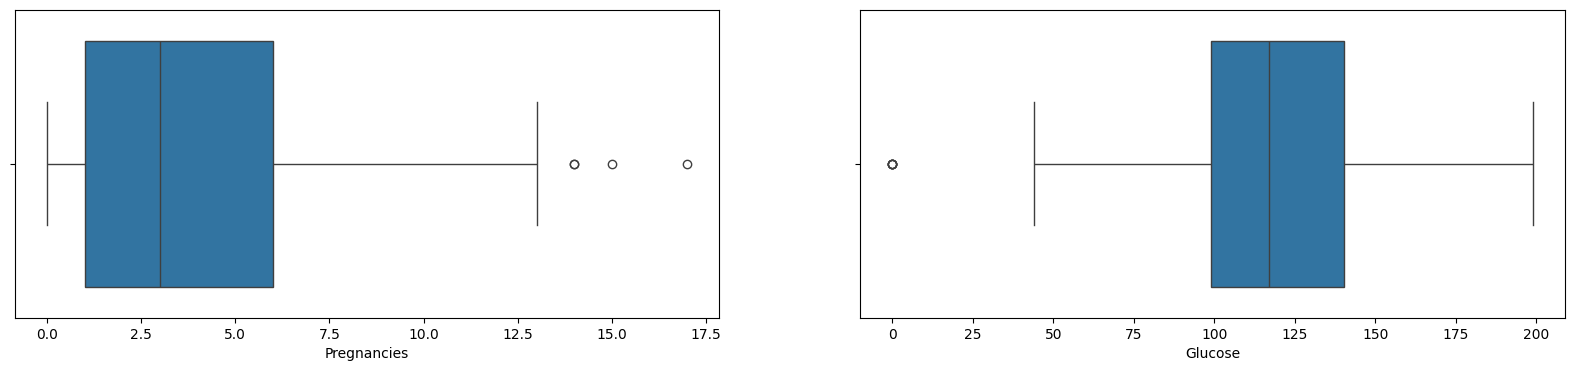

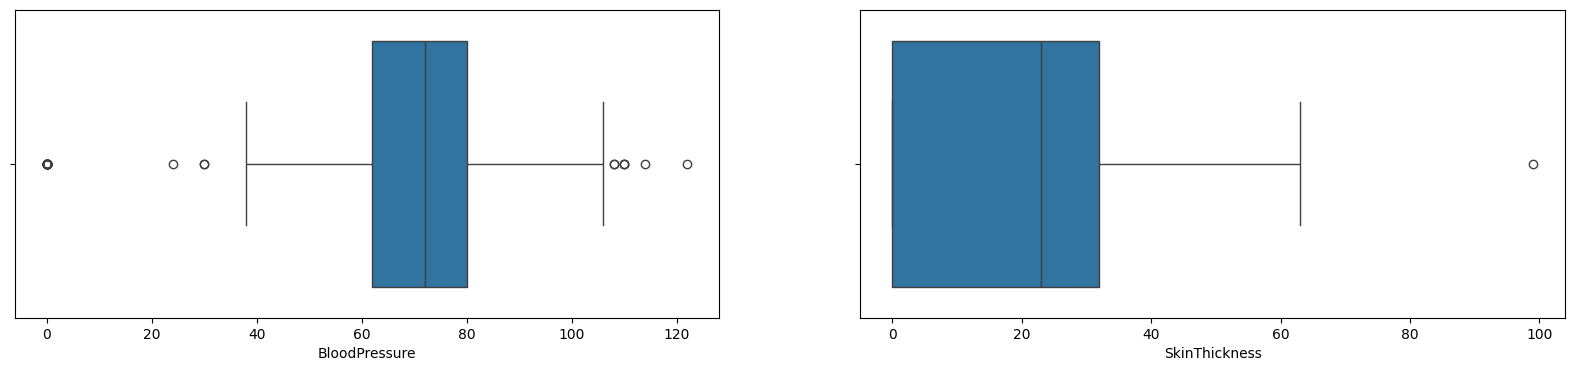

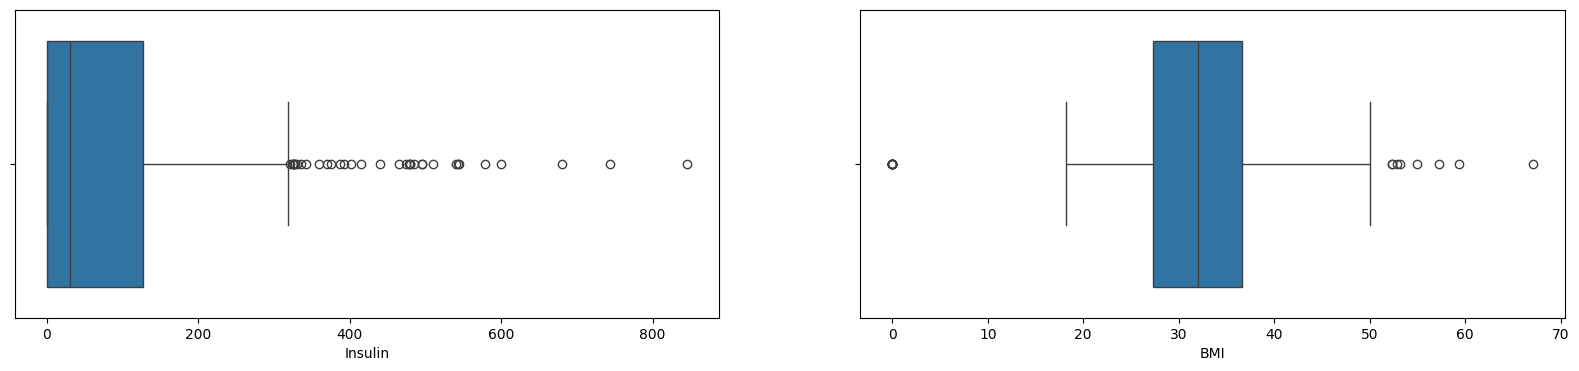

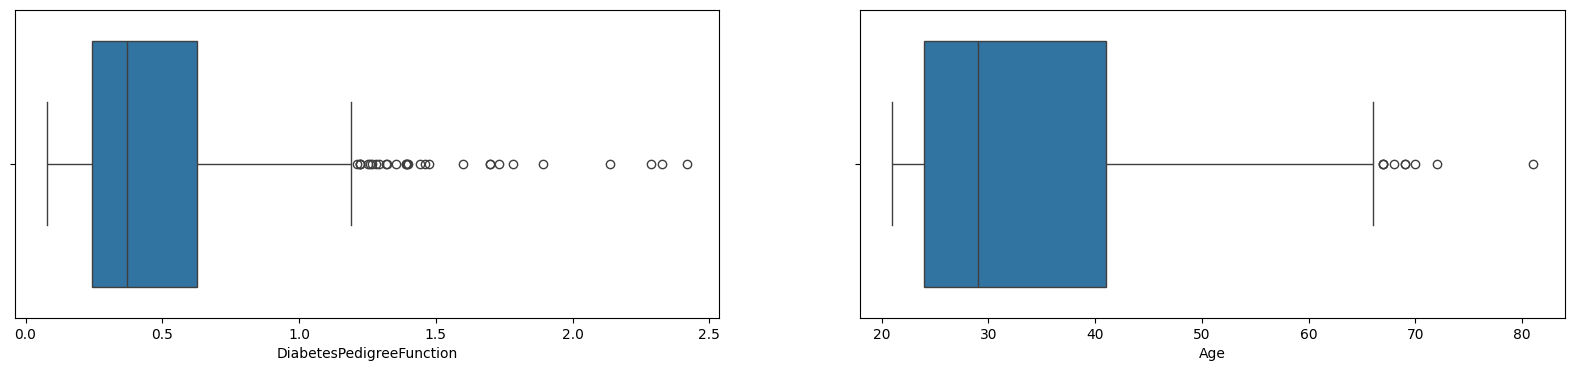

In [ ]:
## plot for numerical columns
Numerical = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
i = 0
while i <8:
    fig = plt.figure(figsize =[20,4])
    plt.subplot(1,2,1)   #(one row, two plots, firs one)
    sns.boxplot(x =Numerical[i], data = diabets_df )
    i+=1
    if i==8:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x =Numerical[i], data = diabets_df)
    i+=1

    plt.show()


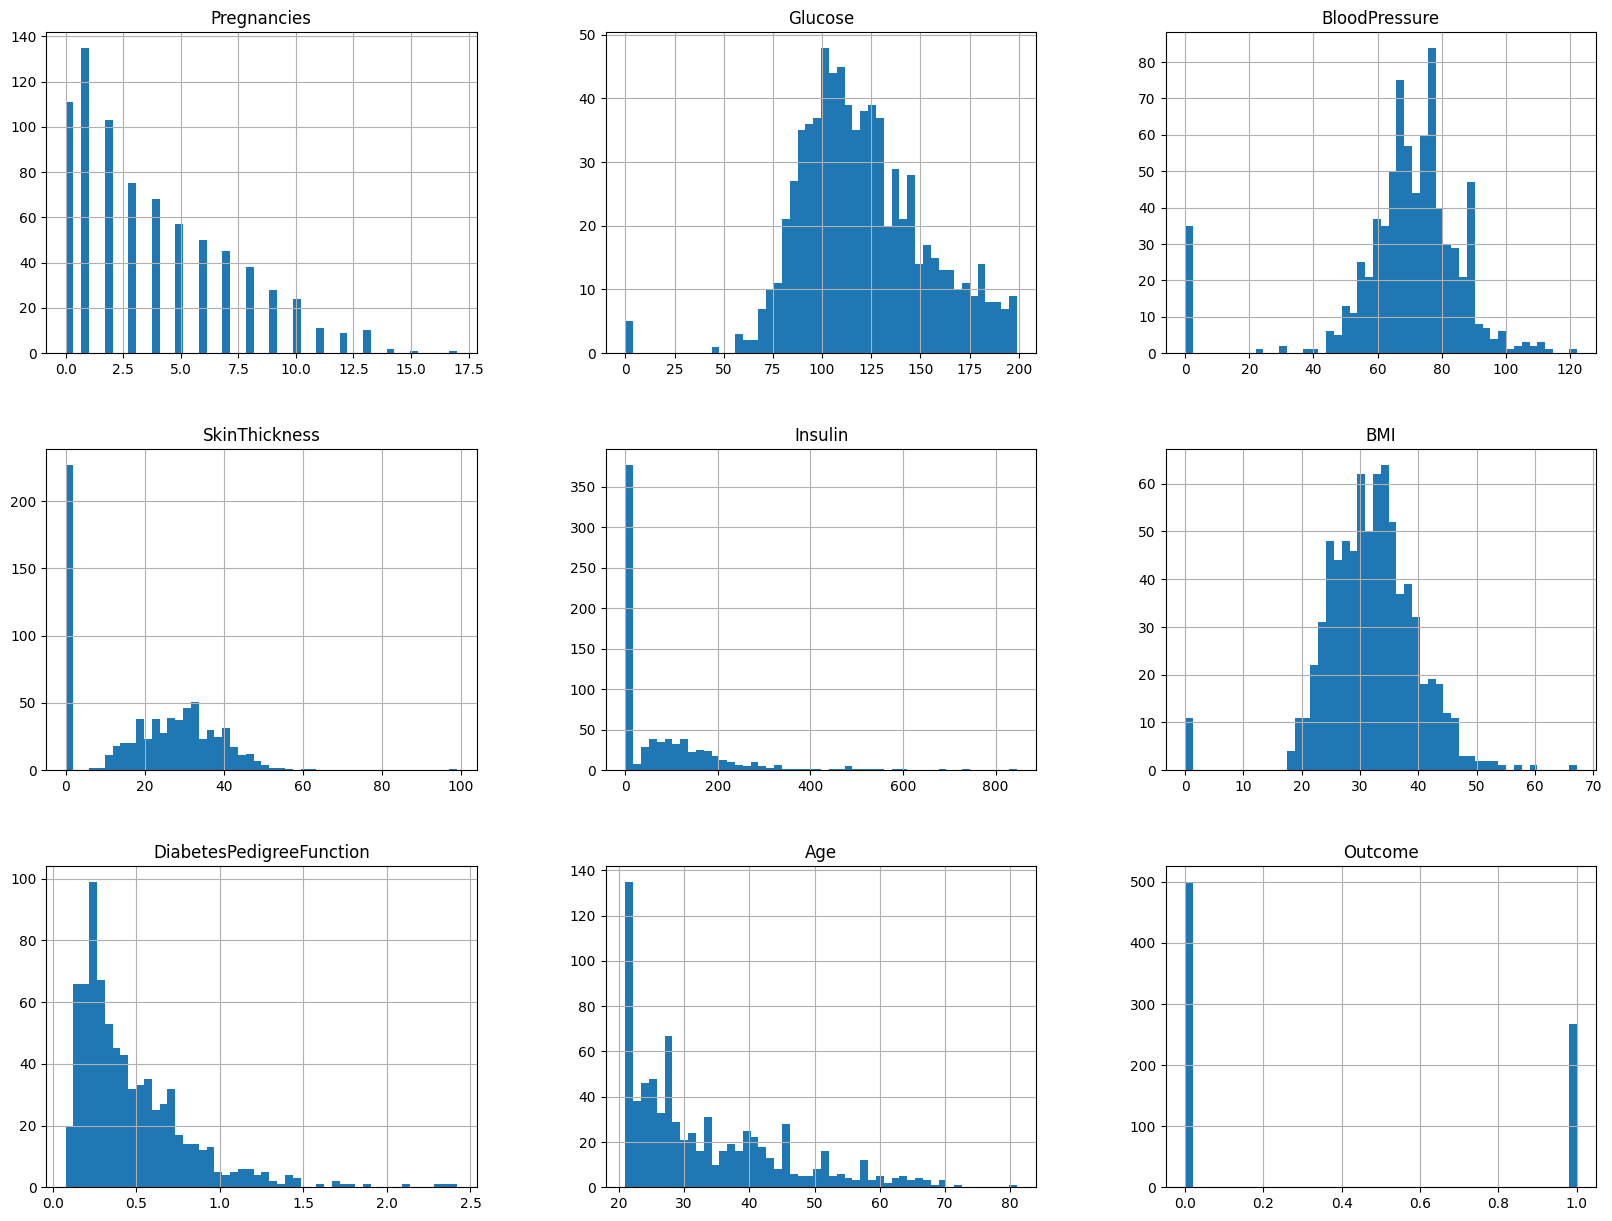

In [ ]:
#histogram
diabets_df.hist(bins=50,figsize=(20,15))
plt.show()

diabets_df3 = diabets_df.copy()

zero_col = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
diabets_df3[zero_col] = diabets_df3[zero_col].replace(0, np.nan)

for col in ['Glucose','Insulin','SkinThickness']:
    median_col = np.median(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(median_col)
for col in ['BMI','BloodPressure']:
    mean_col = np.mean(diabets_df3[diabets_df3[col].notna()][col])
    diabets_df3[col] = diabets_df3[col].fillna(mean_col)

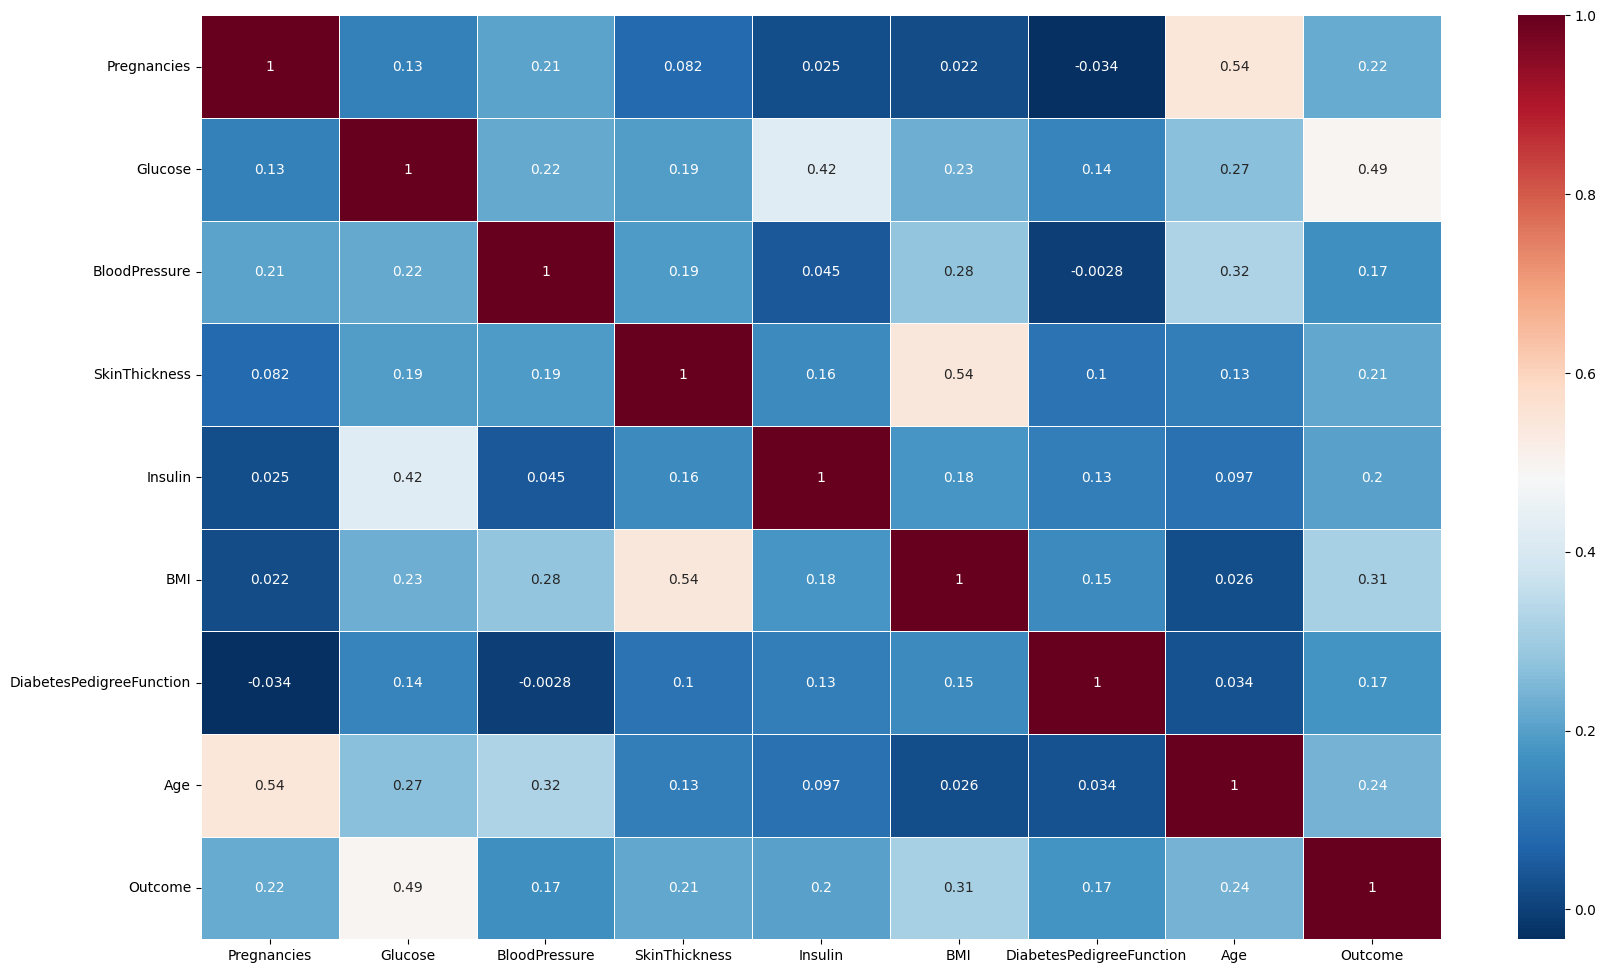

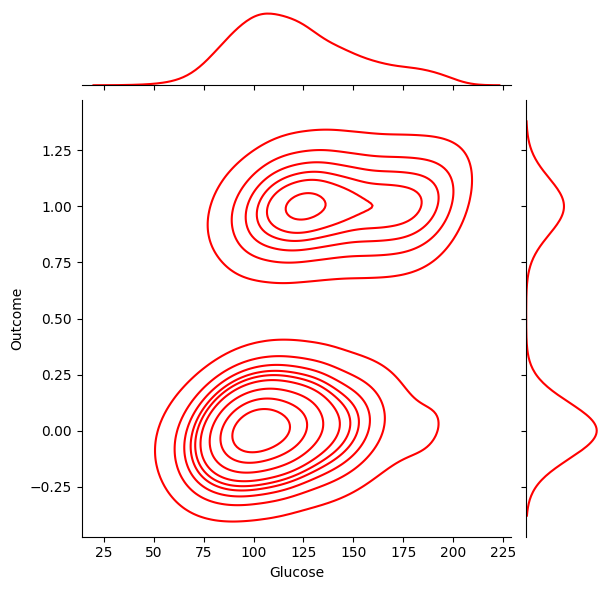

In [ ]:
## Show correlation
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(diabets_df3.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

#best correlation for glucose
diabets_df3.corr()

diabets_df3.corr()['Outcome'].sort_values(ascending=False) #Correlation for get informatio

#### How does Glucose is affected by price
sns.jointplot(x='Glucose',y='Outcome',data=diabets_df3,color='red',kind='kde');


In [ ]:
"""Creating & Training KNN Model¶

"""

# Sellecting features
X = pd.DataFrame(diabets_df3, columns = ["Glucose","BloodPressure", "SkinThickness", "Insulin","BMI","DiabetesPedigreeFunction","Age"]).values
Y = diabets_df3.Outcome.values.reshape(-1,1)
X

# Splitting the data
X_train, X_test, Y_train, Y_test  =  train_test_split(X,Y, test_size = 0.3, random_state = 0)


In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# compute class weights with a dictionary
# Instead of passing a list, use np.unique to get unique classes from Y_train
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train.ravel())

# convert to dictionary
class_weights = {0: class_weights[0], 1: class_weights[1]}

###from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier with class weights
#clf = RandomForestClassifier(class_weight=class_weights_dict, random_state=0)

# Train the classifier
# clf.fit(X_train, Y_train.ravel())

0.7575757575757576
0.6320346320346321


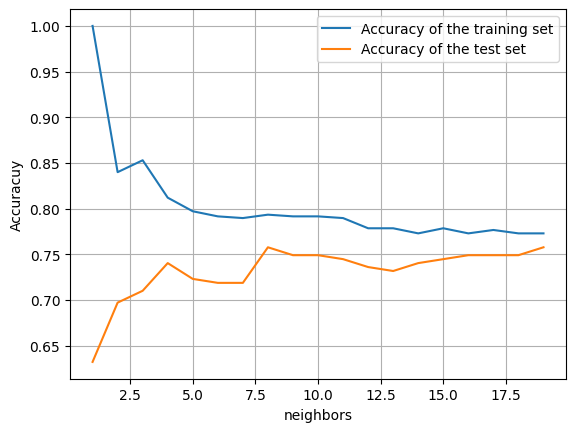

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Example: k=5

# Train the classifier
knn.fit(X_train, Y_train.ravel())

# K = 3
# CLF = KNeighborsClassifier(K)
# CLF.fit(X_train,Y_train.ravel() )
# Y_pred = CLF.predict(X_test)

# Select Best value for K
K = 20
Acc = np.zeros((K))
for i in range(1 , K+1):
    CLF = KNeighborsClassifier(n_neighbors = i)
    CLF.fit(X_train,Y_train.ravel())
    Y_pred = CLF.predict(X_test)
    Acc[i-1] = metrics.accuracy_score(Y_test, Y_pred)
Acc

# Show max & min
print(np.max(Acc))
print(np.min(Acc))

traing_acc = []
test_acc = []
# try KNN for diffrent k nearset neighbor from 1 ta 50
neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,Y_train.ravel())
    traing_acc.append(knn.score(X_train,Y_train))
    test_acc.append(knn.score(X_test, Y_test))

plt.plot(neighbors_setting, traing_acc, label = "Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label = "Accuracy of the test set")
plt.ylabel("Accuracuy")
plt.xlabel("neighbors")
plt.grid()
plt.legend()


In [ ]:
#Improval Model
from sklearn.model_selection import GridSearchCV
# !pip install scikit-learn==1.2.0 #Downgrade scikit-learn is not necessary
from sklearn.neighbors import KNeighborsClassifier #Import KNeighborsClassifier
parametrs = {"n_neighbors": range(1,20) }
knn = KNeighborsClassifier() # Initialize a new KNeighborsClassifier object
grid_kn = GridSearchCV(estimator = knn, #Model
                       param_grid = parametrs, #Range of K
                       scoring = "accuracy",
                       cv = 5,          # cross validation generator
                       verbose = 1,     #Time of calculate
                       n_jobs = None)     # Do not use parallel processing to avoid the error
grid_kn.fit(X_train, Y_train.ravel())

CLF.score(X,Y)

print("Accuracy:" , metrics.accuracy_score(Y_test,Y_pred ))

confusion_matrix(Y,CLF.predict(X))


Fitting 5 folds for each of 19 candidates, totalling 95 fits
Accuracy: 0.7402597402597403


array([[440,  60],
       [124, 144]])

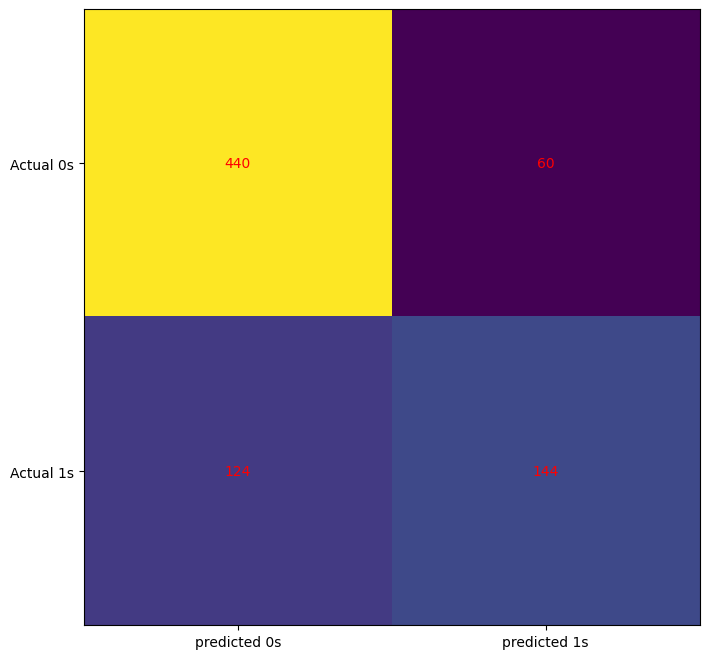

In [ ]:
# Show plot for confusion matrix
cm = confusion_matrix(Y, CLF.predict(X))
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")
plt.show()

In [ ]:
# Calculate classification
print(classification_report(Y, CLF.predict(X)))

"""Creating & Training SVM Model¶

"""

# Sellecting features
X = pd.DataFrame(diabets_df3 , columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
Y = diabets_df3.Outcome

# Splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25 ,random_state = 1)


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       500
           1       0.71      0.54      0.61       268

    accuracy                           0.76       768
   macro avg       0.74      0.71      0.72       768
weighted avg       0.75      0.76      0.75       768



In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights, converting classes to a NumPy array
class_weights = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(Y_train.ravel()), # Convert to NumPy array
                                    y=Y_train.ravel())
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights, converting classes to a NumPy array
class_weights = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(Y_train.ravel()), # Convert to NumPy array
                                    y=Y_train.ravel())

# Convert to dictionary
class_weights_dict = {0: class_weights[0],
                      1: class_weights[1]}


<ipython-input-16-720b5e52eda6>:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  classes=np.unique(Y_train.ravel()), # Convert to NumPy array
<ipython-input-16-720b5e52eda6>:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y=Y_train.ravel())
<ipython-input-16-720b5e52eda6>:13: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  classes=np.unique(Y_train.ravel()), # Convert to NumPy array
<ipython-input-16-720b5e52eda6>:14: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y=Y_train.ravel())


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics  # Assuming you have imported metrics earlier

# Example with a dictionary of class weights
# class_weights = {0: 1, 1: 5}  # Give class 1 five times the weight of class 0
# svm = SVC(class_weight=class_weights)

# Example with 'balanced' class weights
svm = SVC(class_weight='balanced', probability=True) # Add probability=True to enable probability estimates

# Fit the model to the training data
svm.fit(X_train, Y_train) #This line is added to train the model before prediction

# Predict on the test data
Y_pred_svm = svm.predict(X_test)  # Assign the predictions to Y_pred_svm

print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_svm)) # Use Y_pred_svm instead of Y_pred
#الفرق فقط هو 1%

Accuracy:  0.7395833333333334


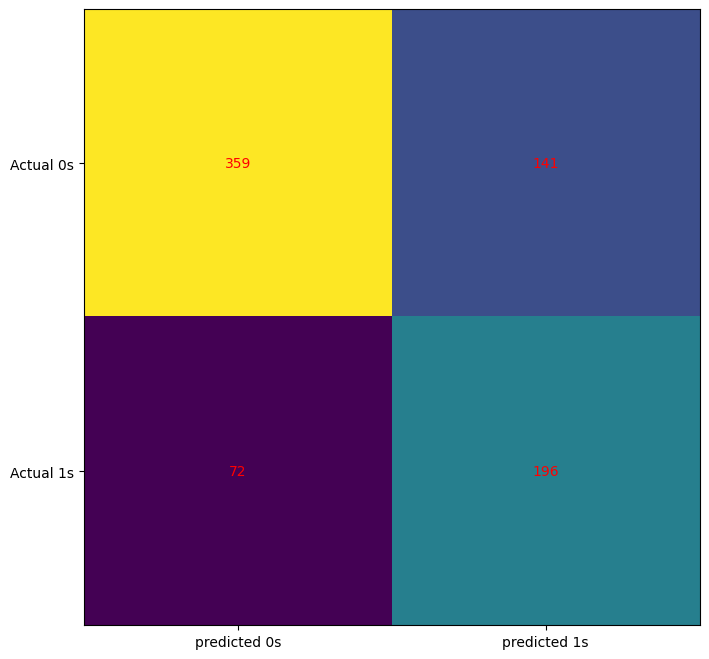

In [ ]:
from sklearn.metrics import confusion_matrix

# Use the trained SVM model 'svm'
confusion_matrix(Y, svm.predict(X))

# show plot for confusion matrix
cm = confusion_matrix(Y, svm.predict(X)) # Use the defined 'svm' variable
fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1) , ticklabels = ("predicted 0s", "predicted 1s"))
ax.yaxis.set(ticks = (0,1) , ticklabels = ("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5 , -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i , cm[i,j], ha = "center" , va = "center", color = "red")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix

# Use Y_pred_svm instead of x_test_pred
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       123
           1       0.61      0.78      0.68        69

    accuracy                           0.74       192
   macro avg       0.73      0.75      0.73       192
weighted avg       0.77      0.74      0.74       192

